Código que lê todos os arquivos .csv contendo os valores das energias obtidas pelo Mathematica e faz um gráfico da energia de cada arquivo em função do tamanho do material.
É feita uma interpolação a partir dos dados lidos, para obter um valor melhor da energia.

In [1]:
import numpy as np
import pylab as plt
import csv
import glob
from scipy.interpolate import interp2d

In [2]:
# caminho da pasta que contém os arquivos que serão lidos
files = glob.glob("C:/Users/Gabriel/Desktop/Google Drive/IC Lazaro/simulacoes/mathematica/nanorod/*.csv")

tamanhos = [] # tamanhos dos materiais lidos
# lê o tamanho do material a partir do nome do arquivo
for fileName in files:
    aux = 0
    nome = ""
    for i in range(len(fileName)):
        if fileName[i] == '.' and fileName[i + 1] == 'c':
            break
        if aux == 1:
            nome += fileName[i]
        if fileName[i] == '_':
            aux = 1
    
    tamanhos.append(float(nome))

tamanhos.sort()
# nomes dos arquivos que serão lidos, agora ordenados
nomes = ["nanorod_" + str(i) + ".csv" for i in tamanhos]

In [3]:
Es = [] # energias de ligacao para cada tamanho
for nome in nomes:
    E_input = [] # valores da energia lidos do arquivo nome
    with open(nome) as file:
        data = list(csv.reader(file))
        
        # leitura dos parâmetros
        a = float(data[0][0])
        lambIni = float(data[0][1])
        lambFin = float(data[0][2])
        lambN = int(data[0][3])
        betaIni = float(data[0][4])
        betaFin = float(data[0][5])
        betaN = int(data[0][6])
        
        # leitura das energias
        for linha in data[1:]:
            aux = []
            for elem in linha:
                aux.append(float(elem))
            E_input.append(aux)
        
        beta_range = np.linspace(betaIni, betaFin, betaN) # range em beta de nome
        lamb_range = np.linspace(lambIni, lambFin, lambN) # range em lambda de nome

        interp = interp2d(lamb_range, beta_range, E_input, kind='cubic') # interpolação cúbica

        beta_range = np.linspace(betaIni, betaFin, 1000) # novo range em beta
        lamb_range = np.linspace(lambIni, lambFin, 1000) # novo range em lambda

        Es_aux = interp(lamb_range, beta_range) # valores de energia para os novos ranges

        energia = np.amin(Es_aux) # energia de ligação de nome
        
        Es.append(energia)

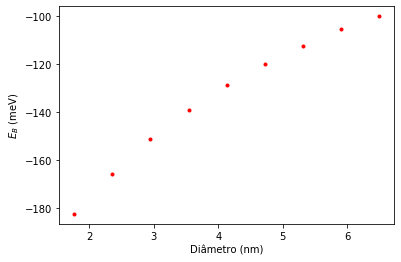

In [4]:
plt.plot(tamanhos, Es, 'r.')
plt.ylabel(r'$E_B$ (meV)')
plt.xlabel(r'Diâmetro (nm)')
plt.savefig('nanorod_eb_tamanho.svg')
plt.show()